<a href="https://colab.research.google.com/github/0339019ca/Data-Analytics-Project-Portfolio/blob/main/The_Airports_Section_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Airports Case Study For Section 2

### Description:
### This case study delves into the analysis of Transportation Security Administration (TSA) claims data to gain insights into airport security incidents. Leveraging a comprehensive dataset encompassing reported incidents and claim outcomes, the analysis aims to uncover patterns, trends, and potential factors contributing to security-related incidents at airports. Through exploratory data analysis (EDA), statistical modeling, and visualization techniques, this study seeks to provide valuable insights to enhance airport security measures and improve passenger experience.

### Data Objectives:

### 1. Data Acquisition: Download and preprocess the TSA claims dataset, ensuring data integrity and consistency for subsequent analysis.

### 2. Exploratory Data Analysis (EDA): Conduct thorough exploratory data analysis to understand the distribution, characteristics, and key features of the TSA claims data. Explore variables such as incident types, locations, time trends, and claim outcomes.

### 3. Incident Identification: Identify and categorize different types of security incidents reported in the dataset, including theft, damage, and loss of belongings, to gain a comprehensive understanding of security vulnerabilities at airports.

### 4. Claim Outcome Analysis: Analyze claim outcomes, including approved, denied, and pending claims, to assess the effectiveness of the TSA's claims resolution process and identify potential areas for improvement.

In [ ]:
!pip install ydata_profiling

In [ ]:
# importing the data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

In [ ]:
# loading the data
from ydata_profiling import ProfileReport

# Download the zip file
zip_file = "https://github.com/fenago/datasets/raw/main/tsa_claims2.zip"
tsa2 = pd.read_csv(zip_file, compression='zip')
tsa2.head()

<ipython-input-3-13c5d02ede6d>:6: DtypeWarning: Columns (0,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  tsa2 = pd.read_csv(zip_file, compression='zip')


Claim Number Date Received    Incident Date Airport Code  \
0       0909802M      4-Jan-02  12/12/2002 0:00          EWR   
1       0202417M      2-Feb-02   1/16/2004 0:00          SEA   
2       0202445M      4-Feb-02  11/26/2003 0:00          STL   
3       0909816M      7-Feb-02    1/6/2003 0:00          MIA   
4  2005032379513     18-Feb-02    2/5/2005 0:00          MCO   

                      Airport Name          Airline Name       Claim Type  \
0     Newark International Airport  Continental Airlines  Property Damage   
1     Seattle-Tacoma International                   NaN  Property Damage   
2  Lambert St. Louis International     American Airlines  Property Damage   
3      Miami International Airport     American Airlines  Property Damage   
4    Orlando International Airport          Delta (Song)  Property Damage   

        Claim Site                                        Item Claim Amount  \
0       Checkpoint                                       Other     $350.00    
1  Checked Baggage   Luggage (all types including footlockers)     $100.00    
2  Checked Baggage                                 Cell Phones     $278.88    
3       Checkpoint   Luggage (all types including footlockers)      $50.00    
4       Checkpoint  Baby - Strollers; car seats; playpen; etc.      $84.79    

     Status Close Amount      Disposition  
0  Approved     $350.00   Approve in Full  
1   Settled      $50.00            Settle  
2   Settled     $227.92            Settle  
3  Approved      $50.00   Approve in Full  
4  Approved      $84.79   Approve in Full

In [ ]:
profile = ProfileReport(tsa2, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
tsa2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204267 entries, 0 to 204266
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Claim Number   204267 non-null  object
 1   Date Received  204004 non-null  object
 2   Incident Date  202084 non-null  object
 3   Airport Code   195743 non-null  object
 4   Airport Name   195743 non-null  object
 5   Airline Name   169893 non-null  object
 6   Claim Type     196354 non-null  object
 7   Claim Site     203527 non-null  object
 8   Item           200301 non-null  object
 9   Claim Amount   200224 non-null  object
 10  Status         204262 non-null  object
 11  Close Amount   135315 non-null  object
 12  Disposition    131359 non-null  object
dtypes: object(13)
memory usage: 20.3+ MB


In [ ]:
tsa2.nunique()

Claim Number     204258
Date Received      4007
Incident Date     26807
Airport Code        465
Airport Name        485
Airline Name        318
Claim Type           11
Claim Site            6
Item               4704
Claim Amount      36117
Status               15
Close Amount      17162
Disposition           3
dtype: int64

In [ ]:
tsa2.apply(pd.unique)

Claim Number     [0909802M, 0202417M, 0202445M, 0909816M, 20050...
Date Received    [4-Jan-02, 2-Feb-02, 4-Feb-02, 7-Feb-02, 18-Fe...
Incident Date    [12/12/2002 0:00, 1/16/2004 0:00, 11/26/2003 0...
Airport Code     [EWR, SEA, STL, MIA, MCO, CAK, PHL, BWI, PHX, ...
Airport Name     [Newark International Airport, Seattle-Tacoma ...
Airline Name     [Continental Airlines, nan, American Airlines,...
Claim Type       [Property Damage, Passenger Property Loss, nan...
Claim Site       [Checkpoint, Checked Baggage, Other, Motor Veh...
Item             [Other, Luggage (all types including footlocke...
Claim Amount     [$350.00 , $100.00 , $278.88 , $50.00 , $84.79...
Status           [Approved, Settled, Canceled, Denied, Insuffic...
Close Amount     [$350.00 , $50.00 , $227.92 , $84.79 , $227.00...
Disposition                   [Approve in Full, Settle, nan, Deny]
dtype: object

# Clean The Data

## Drop all rows that contain NA values.

In [ ]:
# Dropping all missing values from the dataset
tsa2.dropna()
tsa2

Claim Number Date Received    Incident Date Airport Code  \
0            0909802M      4-Jan-02  12/12/2002 0:00          EWR   
1            0202417M      2-Feb-02   1/16/2004 0:00          SEA   
2            0202445M      4-Feb-02  11/26/2003 0:00          STL   
3            0909816M      7-Feb-02    1/6/2003 0:00          MIA   
4       2005032379513     18-Feb-02    2/5/2005 0:00          MCO   
...               ...           ...              ...          ...   
204262  2015120427297     20-Nov-15        16-Oct-15            -   
204263  2015123027969     17-Dec-15         2-Dec-15            -   
204264  2016010428072     22-Dec-15        20-Dec-15            -   
204265  2016011328300     30-Dec-15        28-Dec-15            -   
204266  2015123128015     31-Dec-15        23-Nov-15            -   

                           Airport Name          Airline Name  \
0          Newark International Airport  Continental Airlines   
1          Seattle-Tacoma International                   NaN   
2       Lambert St. Louis International     American Airlines   
3           Miami International Airport     American Airlines   
4         Orlando International Airport          Delta (Song)   
...                                 ...                   ...   
204262                                -                     -   
204263                                -                     -   
204264                                -                     -   
204265                                -                     -   
204266                                -                     -   

                     Claim Type       Claim Site  \
0               Property Damage       Checkpoint   
1               Property Damage  Checked Baggage   
2               Property Damage  Checked Baggage   
3               Property Damage       Checkpoint   
4               Property Damage       Checkpoint   
...                         ...              ...   
204262          Property Damage  Checked Baggage   
204263          Property Damage  Checked Baggage   
204264  Passenger Property Loss  Checked Baggage   
204265  Passenger Property Loss  Checked Baggage   
204266  Passenger Property Loss       Checkpoint   

                                                     Item Claim Amount  \
0                                                   Other     $350.00    
1               Luggage (all types including footlockers)     $100.00    
2                                             Cell Phones     $278.88    
3               Luggage (all types including footlockers)      $50.00    
4              Baby - Strollers; car seats; playpen; etc.      $84.79    
...                                                   ...          ...   
204262  Baggage/Cases/Purses; Books; Magazines & Other...            -   
204263                            Audio/Video; Home Decor            -   
204264                                           Clothing            -   
204265                  Tools & Home Improvement Supplies            -   
204266                               Personal Accessories            -   

          Status Close Amount      Disposition  
0       Approved     $350.00   Approve in Full  
1        Settled      $50.00            Settle  
2        Settled     $227.92            Settle  
3       Approved      $50.00   Approve in Full  
4       Approved      $84.79   Approve in Full  
...          ...          ...              ...  
204262         -          NaN              NaN  
204263         -          NaN              NaN  
204264         -          NaN              NaN  
204265         -          NaN              NaN  
204266         -          NaN              NaN  

[204267 rows x 13 columns]

## Store the date columns with the datetime type.


In [ ]:
# Conver "Date Received" column
tsa2['Date Received'] = pd.to_datetime(tsa2['Date Received'])

In [ ]:
# Convert the "Incident Date" column to datetime
tsa2['Incident Date'] = pd.to_datetime(tsa2['Incident Date'], errors='coerce')

# Extract only the date portion (remove time)
tsa2['Date Only'] = tsa2['Incident Date'].dt.date

# Now the "Date Only" column contains the dates without the time component
print(tsa2[['Incident Date', 'Date Only']].head())

  Incident Date   Date Only
0    2002-12-12  2002-12-12
1    2004-01-16  2004-01-16
2    2003-11-26  2003-11-26
3    2003-01-06  2003-01-06
4    2005-02-05  2005-02-05


In [ ]:
tsa2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204267 entries, 0 to 204266
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Claim Number   204267 non-null  object        
 1   Date Received  204004 non-null  datetime64[ns]
 2   Incident Date  201920 non-null  datetime64[ns]
 3   Airport Code   195743 non-null  object        
 4   Airport Name   195743 non-null  object        
 5   Airline Name   169893 non-null  object        
 6   Claim Type     196354 non-null  object        
 7   Claim Site     203527 non-null  object        
 8   Item           200301 non-null  object        
 9   Claim Amount   200224 non-null  object        
 10  Status         204262 non-null  object        
 11  Close Amount   135315 non-null  object        
 12  Disposition    131359 non-null  object        
 13  Date Only      201920 non-null  object        
dtypes: datetime64[ns](2), object(12)
memory usage: 21.8+

# Make sure the questions you answered for section 1 still work.


## What is the most common type of insurance claim?


In [ ]:
claim_type = tsa2["Claim Type"].value_counts().head()
claim_type

Passenger Property Loss    117868
Property Damage             75364
Personal Injury              1465
Employee Loss (MPCECA)        485
Passenger Theft               465
Name: Claim Type, dtype: int64

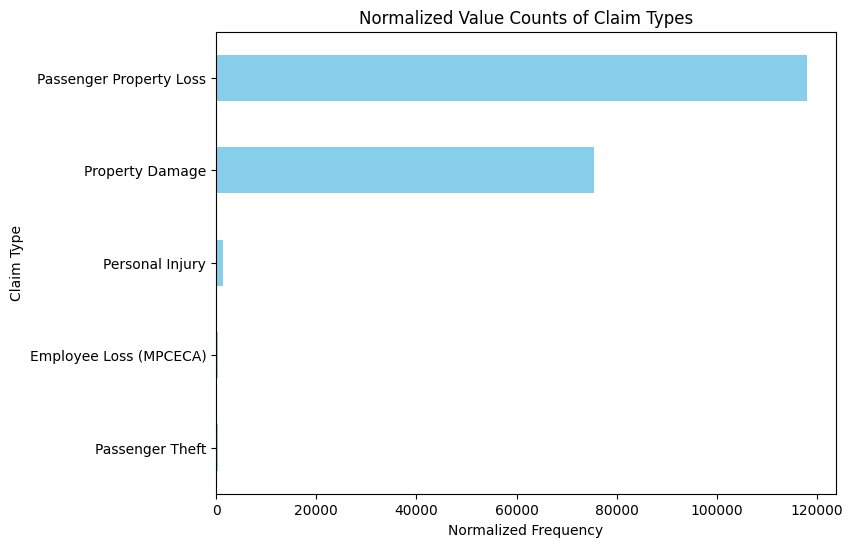

In [ ]:
# A horizontal bar chart
plt.figure(figsize=(8, 6))
claim_type.plot(kind="barh", color="skyblue")
plt.xlabel("Normalized Frequency")
plt.ylabel("Claim Type")
plt.title("Normalized Value Counts of Claim Types")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

In [ ]:
claim_type_counts = tsa2["Claim Type"].value_counts(normalize=True).head()
claim_type_counts

Passenger Property Loss    0.600283
Property Damage            0.383817
Personal Injury            0.007461
Employee Loss (MPCECA)     0.002470
Passenger Theft            0.002368
Name: Claim Type, dtype: float64

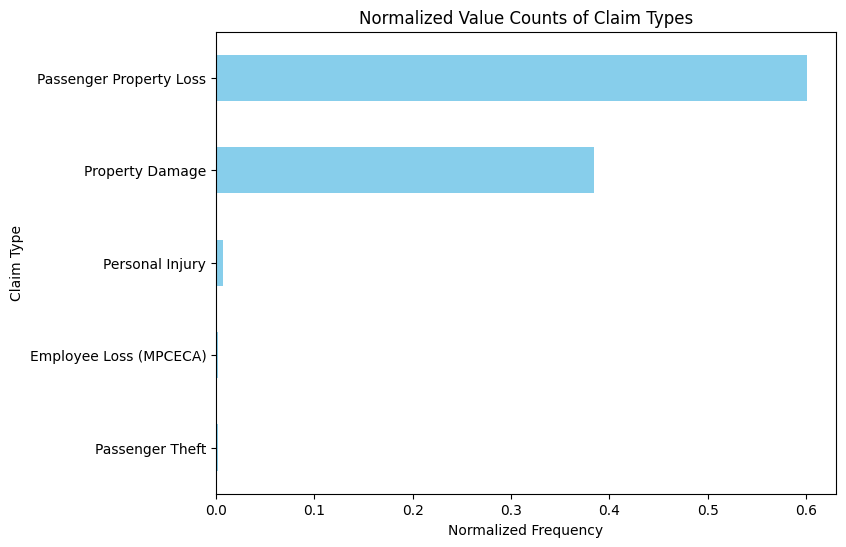

In [ ]:
# Create a horizontal bar chart
plt.figure(figsize=(8, 6))
claim_type_counts.plot(kind="barh", color="skyblue")
plt.xlabel("Normalized Frequency")
plt.ylabel("Claim Type")
plt.title("Normalized Value Counts of Claim Types")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

## Which claim site within the airport are claims most commonly filed for?

In [ ]:
# The value counts for each claim site
claim_site_counts = tsa2["Claim Site"].value_counts()
claim_site_counts

Checked Baggage    159753
Checkpoint          40133
Other                2875
Motor Vehicle         474
-                     276
Bus Station            16
Name: Claim Site, dtype: int64

In [ ]:
claim_site_counts = tsa2["Claim Site"].value_counts(normalize=True).head()
claim_site_counts

Checked Baggage    0.784923
Checkpoint         0.197188
Other              0.014126
Motor Vehicle      0.002329
-                  0.001356
Name: Claim Site, dtype: float64

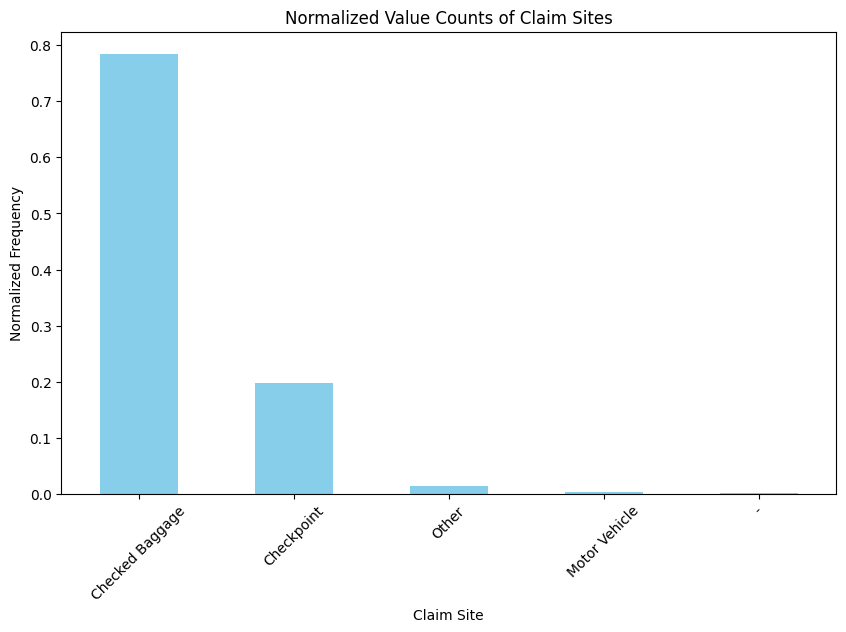

In [ ]:
# Create a bar chart
plt.figure(figsize=(10, 6))
claim_site_counts.plot(kind="bar", color="skyblue")
plt.xlabel("Claim Site")
plt.ylabel("Normalized Frequency")
plt.title("Normalized Value Counts of Claim Sites")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

## What type of claim is made most at each claim site?


In [ ]:
# Grouping by claim site and count claim types
claim_type_counts_by_site = tsa2.groupby("Claim Site")["Claim Type"].value_counts()
claim_type_counts_by_site

Claim Site       Claim Type             
-                -                            127
                 Passenger Property Loss       92
                 Property Damage               40
                 Personal Injury               10
                 Complaint                      3
                 Motor Vehicle                  3
                 Employee Loss (MPCECA)         1
Bus Station      Passenger Property Loss        9
                 Property Damage                7
Checked Baggage  Passenger Property Loss    99708
                 Property Damage            54083
                 Passenger Theft              396
                 Employee Loss (MPCECA)       383
                 Personal Injury              248
                 -                             99
                 Motor Vehicle                 26
                 Complaint                     20
                 Bus Terminal                   1
                 Compliment                     1
Checkpoin

In [ ]:
# Find the most common claim type at each site
most_common_claim_types = claim_type_counts_by_site.groupby(level=0).idxmax().apply(lambda x: x[1])
most_common_claim_types

Claim Site
-                                        -
Bus Station        Passenger Property Loss
Checked Baggage    Passenger Property Loss
Checkpoint                 Property Damage
Motor Vehicle                Motor Vehicle
Other                      Property Damage
Name: Claim Type, dtype: object

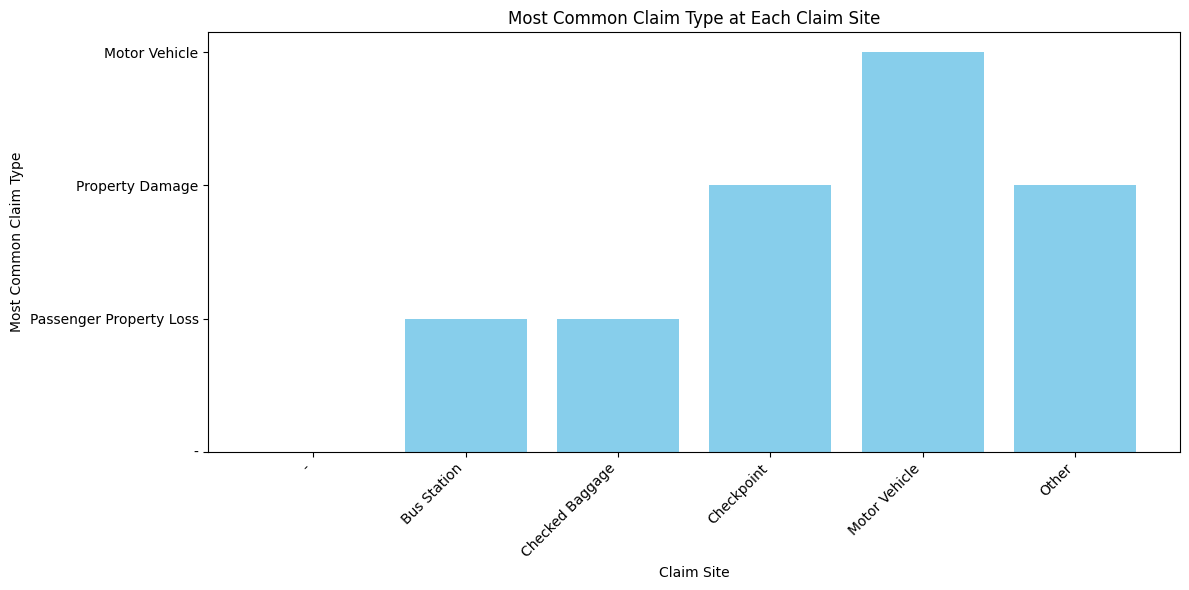

In [ ]:
# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(most_common_claim_types.index, most_common_claim_types.values, color="skyblue")
plt.xlabel("Claim Site")
plt.ylabel("Most Common Claim Type")
plt.title("Most Common Claim Type at Each Claim Site")
plt.xticks(rotation=45, ha="right")

# Show the chart
plt.tight_layout()
plt.show()

## What is the typical claim amount?


In [ ]:
# Calculating the mode for claim amounts
claim_amount_mode = tsa2["Claim Amount"].mode().iloc[0]
claim_amount_mode

'$0.00 '

In [ ]:
tsa2["Claim Amount"].value_counts().head(94848)

$0.00         28445
-             12752
$100.00        3871
$50.00         3460
$200.00        3266
              ...  
$102.37           1
$2;008.95         1
$11.05            1
$645.86           1
$3;668.84         1
Name: Claim Amount, Length: 36117, dtype: int64

# If a claim is approved or settled, what percent of the claim amount do the airports pay?


In [ ]:
approved_settled_claims = tsa2[tsa2["Disposition"].isin(["Approved", "Settled"])]

total_claim_amount = approved_settled_claims["Close Amount"].sum()

total_airport_payments = approved_settled_claims.groupby("Airport Code")["Close Amount"].sum()

airport_payment_percent = (total_airport_payments / total_claim_amount) * 100

In [ ]:
total_claim_amount

0

In [ ]:
total_airport_payments

Series([], Name: Close Amount, dtype: object)

In [ ]:
airport_payment_percent

Series([], Name: Close Amount, dtype: object)

In [ ]:
tsa2.head()

Claim Number Date Received Incident Date Airport Code  \
0       0909802M    2002-01-04    2002-12-12          EWR   
1       0202417M    2002-02-02    2004-01-16          SEA   
2       0202445M    2002-02-04    2003-11-26          STL   
3       0909816M    2002-02-07    2003-01-06          MIA   
4  2005032379513    2002-02-18    2005-02-05          MCO   

                      Airport Name          Airline Name       Claim Type  \
0     Newark International Airport  Continental Airlines  Property Damage   
1     Seattle-Tacoma International                   NaN  Property Damage   
2  Lambert St. Louis International     American Airlines  Property Damage   
3      Miami International Airport     American Airlines  Property Damage   
4    Orlando International Airport          Delta (Song)  Property Damage   

        Claim Site                                        Item Claim Amount  \
0       Checkpoint                                       Other     $350.00    
1  Checked Baggage   Luggage (all types including footlockers)     $100.00    
2  Checked Baggage                                 Cell Phones     $278.88    
3       Checkpoint   Luggage (all types including footlockers)      $50.00    
4       Checkpoint  Baby - Strollers; car seats; playpen; etc.      $84.79    

     Status Close Amount      Disposition   Date Only  
0  Approved     $350.00   Approve in Full  2002-12-12  
1   Settled      $50.00            Settle  2004-01-16  
2   Settled     $227.92            Settle  2003-11-26  
3  Approved      $50.00   Approve in Full  2003-01-06  
4  Approved      $84.79   Approve in Full  2005-02-05

# What are the five airports with the most claims?


In [ ]:
# Convert the "top_airports" values to numeric (int or float)
top_airports = airport_payment_percent.apply(pd.to_numeric, errors='coerce')

# Now "top_airports" contains numeric values
print(top_airports)

top_5_values = tsa2['Airport Name'].value_counts().head(5)

top_5_values

Series([], Name: Close Amount, dtype: object)


John F. Kennedy International           9232
Los Angeles International Airport       7260
Newark International Airport            6866
Chicago O'Hare International Airport    6843
Miami International Airport             6432
Name: Airport Name, dtype: int64